In [3]:
import numpy as np
import george
from george import kernels
import schwimmbad
from dynesty import plotting as dyplot
import dynesty
import time
import pickle
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
fitdata=np.load("../notebooks/2d_fitdata_45.npy")
with open ('../grid_metadata/grid45_coords.txt', 'rb') as fp:
    coords = pickle.load(fp)
h_0=fitdata[:,0]
logR_in=fitdata[:,1]
w2=fitdata[:,2+2]
yerr=np.array([j*0.01 for j in w2])

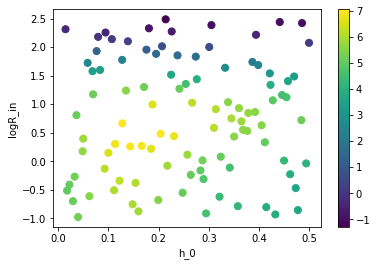

In [4]:
style = dict(cmap='viridis', vmin=np.min(w2), vmax=np.max(w2))
plt.scatter(h_0,logR_in, c=w2, s=50, **style)
plt.xlabel("h_0")
plt.ylabel("logR_in")
plt.colorbar()
plt.show()

In [5]:
x=np.transpose(coords)
kernel = np.var(w2) * kernels.ExpSquaredKernel(0.1**2,ndim=2,axes=0)* kernels.ExpSquaredKernel(0.5**2,ndim=2,axes=1)
gp = george.GP(kernel)
gp.compute(x,yerr)

np.set_printoptions(suppress=True)
print("Initial ln-likelihood: {0:.2f}".format(gp.log_likelihood(w2)))
print(gp.get_parameter_vector())
print(np.sqrt(np.exp(gp.get_parameter_vector())))

Initial ln-likelihood: 3.54
[ 0.94924264 -4.60517019 -1.38629436]
[1.60740539 0.1        0.5       ]


In [6]:
ndim = 3

def loglike (p):
    try:        
        gp.set_parameter_vector(p)
        return gp.log_likelihood(w2)
    except:
        return -100000
        

def ptform(u):
    #  [-50,50] [-9.2,-1.4] [-4.6,2.5]
    return [u[0]*100 -50, u[1]*7.8-9.2 , u[2]*7.1-4.6 ]


In [11]:
sampler = dynesty.NestedSampler(loglike, ptform, ndim,nlive=1000, pool=schwimmbad.MultiPool())


In [12]:
t0=time.time()
sampler.run_nested()
print(time.time()-t0)
results = sampler.results

iter: 11349 | +1000 | bound: 14 | nc: 1 | ncall: 57059 | eff(%): 21.643 | loglstar:   -inf < 58.582 <    inf | logz: 47.331 +/-  0.155 | dlogz:  0.001 >  1.009                                       

201.83573174476624


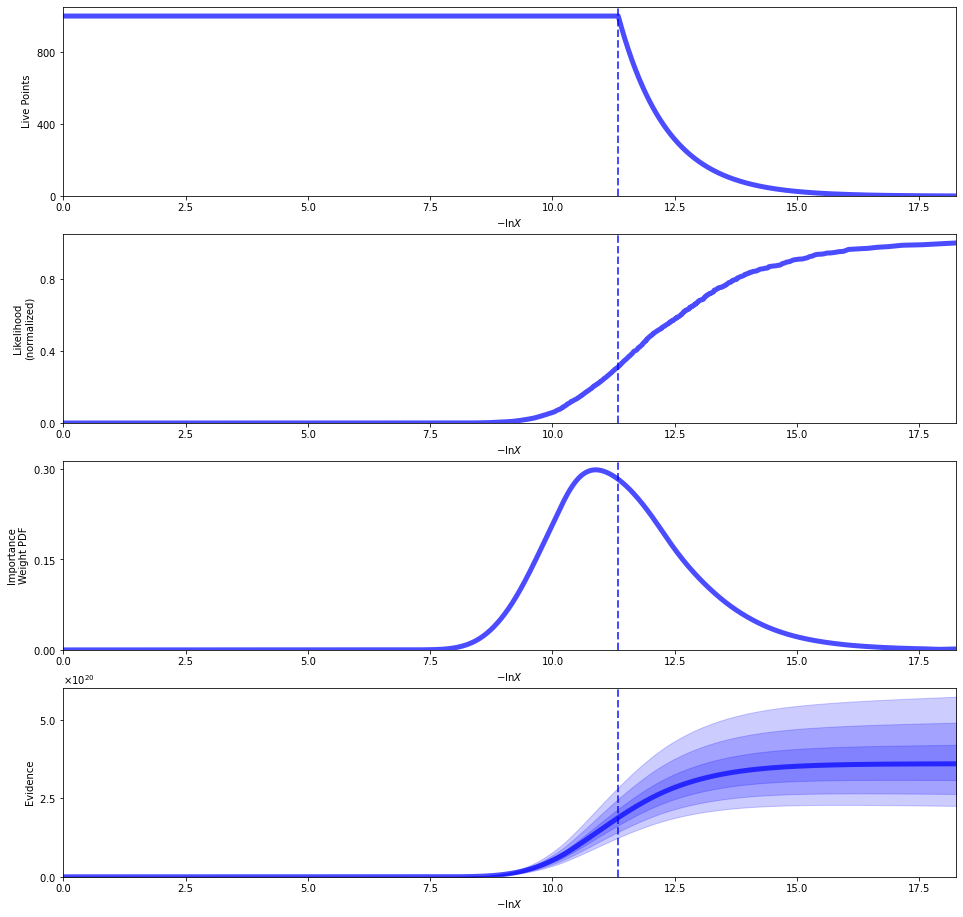

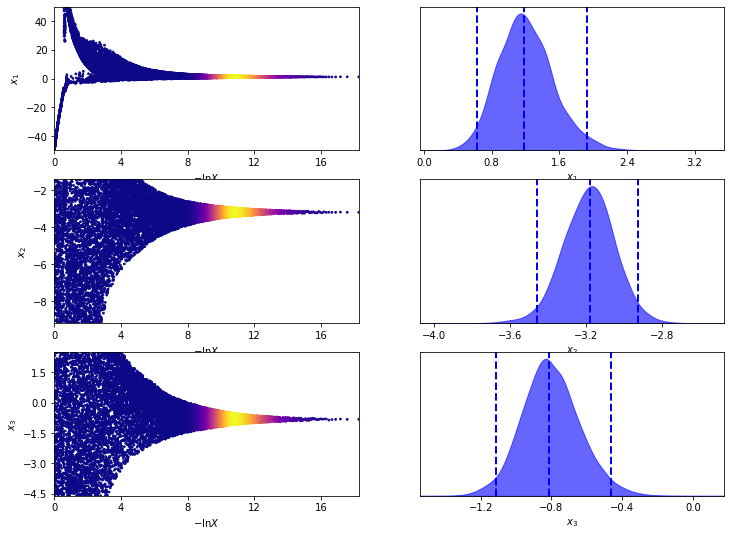

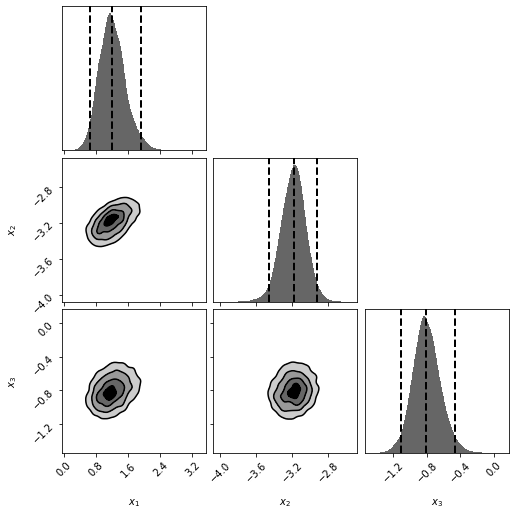

In [13]:
# Plot a summary of the run.
rfig, raxes = dyplot.runplot(results)

# Plot traces and 1-D marginalized posteriors.
tfig, taxes = dyplot.traceplot(results)

# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(results)

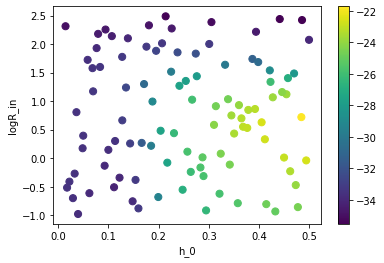

In [5]:
fitdata=np.load("../notebooks/2d_fitdata_45.npy")
with open ('../grid_metadata/grid45_coords.txt', 'rb') as fp:
    coords = pickle.load(fp)
h_0=fitdata[:,0]
logR_in=fitdata[:,1]
w2=fitdata[:,2+0]
yerr=np.array([j*0.01 for j in w2])

style = dict(cmap='viridis', vmin=np.min(w2), vmax=np.max(w2))
plt.scatter(h_0,logR_in, c=w2, s=50, **style)
plt.xlabel("h_0")
plt.ylabel("logR_in")
plt.colorbar()
plt.show()

In [6]:
x=np.transpose(coords)
kernel = np.var(w2) * kernels.ExpSquaredKernel(0.1**2,ndim=2,axes=0)* kernels.ExpSquaredKernel(0.5**2,ndim=2,axes=1)
gp = george.GP(kernel)
gp.compute(x,yerr)

np.set_printoptions(suppress=True)
print("Initial ln-likelihood: {0:.2f}".format(gp.log_likelihood(w2)))
print(gp.get_parameter_vector())
print(np.sqrt(np.exp(gp.get_parameter_vector())))

Initial ln-likelihood: -354.95
[ 2.2736685  -4.60517019 -1.38629436]
[3.11688545 0.1        0.5       ]


In [12]:
np.log(1**2)

0.0

In [7]:
ndim = 3

def loglike (p):
    try:        
        gp.set_parameter_vector(p)
        return gp.log_likelihood(w2)
    except:
        return -100000

def ptform(u):
    #  [-50,50] [-9.2,-1.4] [-4.6,2.5]
    return [u[0]*100 -50, u[1]*7.8-9.2 , u[2]*7.1-4.6 ]

In [8]:
sampler = dynesty.NestedSampler(loglike, ptform, ndim,nlive=1000, pool=schwimmbad.MultiPool())

iter: 10790 | +1000 | bound: 14 | nc: 1 | ncall: 54572 | eff(%): 21.604 | loglstar:   -inf < -98.041 <    inf | logz: -108.719 +/-  0.150 | dlogz:  0.001 >  1.009                                    

311.7150182723999


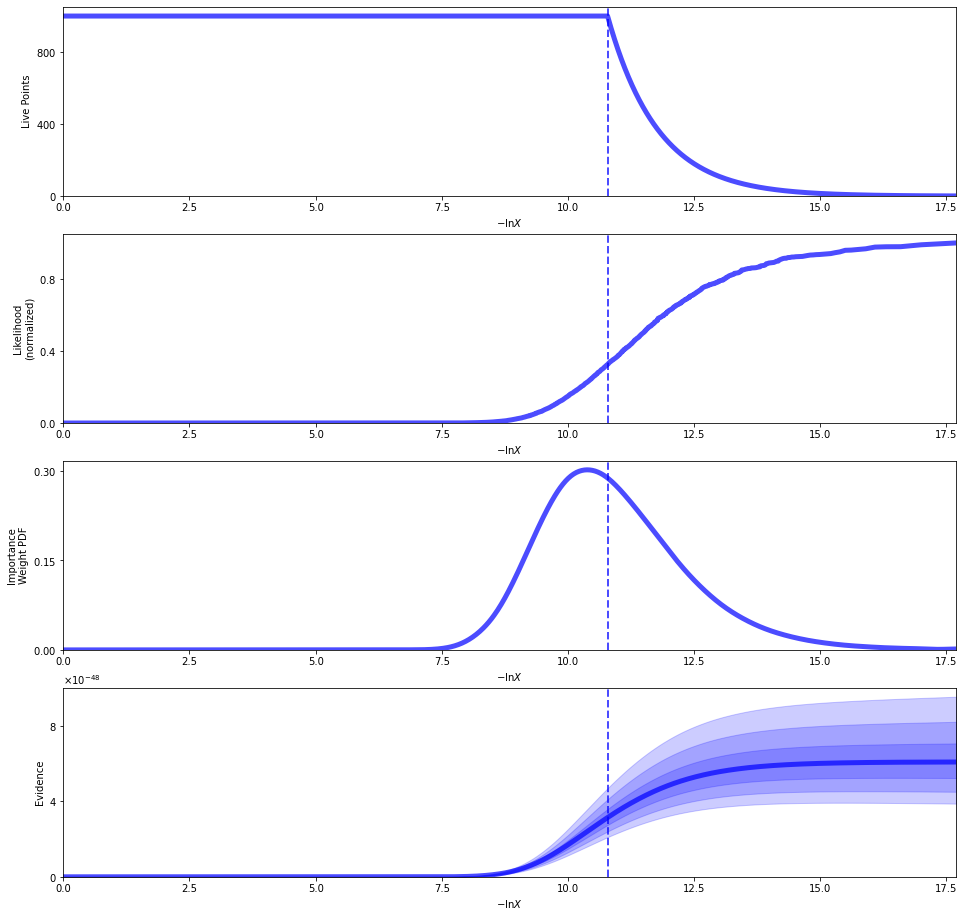

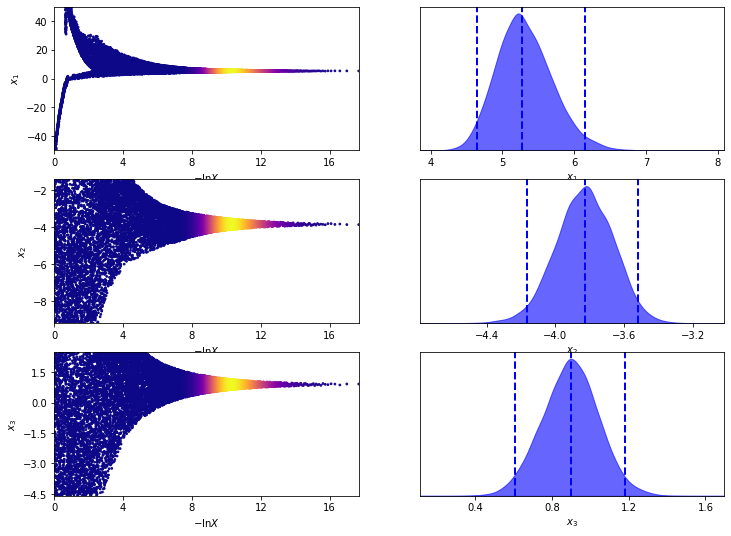

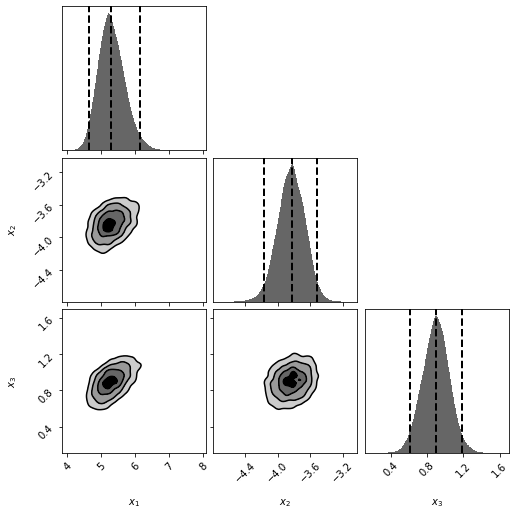

In [9]:
t0=time.time()
sampler.run_nested()
print(time.time()-t0)
results = sampler.results

# Plot a summary of the run.
rfig, raxes = dyplot.runplot(results)

# Plot traces and 1-D marginalized posteriors.
tfig, taxes = dyplot.traceplot(results)

# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(results)